<div class='alert alert-info'>
    <h1 align="center">Non-linear Logistic Regression</h1>
    <h3 align="center">Mohammad Rahdar</h3>
</div>

# Introduction

Non-linear logistic regression, also known as polynomial logistic regression, is a variant of logistic regression where the relationship between the independent variables (features) and the log-odds of the dependent variable (target) is modeled using non-linear functions. The decision boundary between different classes is a curve or a more complex boundary depending on the non-linear transformations used in the model.

- Non-linear logistic regression allows for more flexible modeling of complex relationships between features and the target variable.
- However, non-linear logistic regression may suffer from overfitting if the model complexity is too high relative to the amount of available data.
- Regularization techniques such as L1 or L2 regularization can be used to mitigate overfitting in non-linear logistic regression models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

Let's generates synthetic data for a classification problem with two classes using `make_blobs` from sklearn: negative (0) and positive (1). The result `mydata` is a synthetic dataset with randomly generated features `x1`, `x2` and corresponding labels `y`.

In [2]:
X, y = make_blobs(n_samples=200, centers=[[0, 0], [1.5, 2]], random_state=14)

In [3]:
# Define a function for visualizing data points

def plotData(X, y):
    """
    Inputs:
        X: Feature matrix where each row represents a training
           example and each column represents a feature.
        y: Target vector containing the class labels for the training examples.
        
    Output:
        Scatter plot showing the distribution of data points for each class
        in a two-dimensional feature space.
    """
    
    # identify the indices of data points belonging to each class
    class0 = y == 0
    class1 = y == 1

    plt.scatter(X[class0, 0], X[class0, 1], color='r', marker='x', label='class0')
    plt.scatter(X[class1, 0], X[class1, 1], color='b', marker='o', label='class1')

    plt.xlabel('feature 1', size=14)
    plt.ylabel('feature 2', size=14)
    plt.legend()

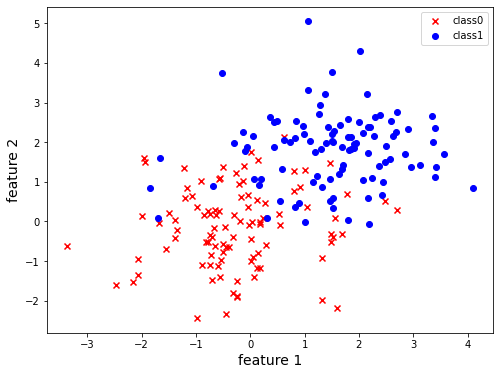

In [4]:
plt.figure(figsize=(8,6))
plotData(X, y)

In [5]:
# Define a function for visualizing decision boundaries

def plotDB(X, model, d):
    """
    Inputs:
        X: Feature matrix where each row represents a training
           example and each column represents a feature.
        model: Trained classification model   
        d: Degree of the polynomial features used in the logistic regression model
        
    Output:
        Visualization showing decision boundaries and decision regions
        of the classification model in a two-dimensional feature space.    
    """
    
    u_min, u_max = X[:, 0].min(), X[:, 0].max()
    v_min, v_max = X[:, 1].min(), X[:, 1].max()
    
    # create a grid of points (xx, yy) covering the entire feature space
    U, V = np.meshgrid(np.arange(u_min, u_max, .02),
                       np.arange(v_min, v_max, .02))
    
    b = model.intercept_.reshape(-1,1)
    w_ = model.coef_

    # concatenates the intercept term and the coefficients of the polynomial
    # features along the columns and flattens the resulting array into a 1D array
    w = np.ravel(np.concatenate((b, w_), axis = 1))

    
    # maps the original features U and V to polynomial features up to the specified degree
    X_ = np.concatenate((U.reshape(-1,1), V.reshape(-1,1)), axis=1)
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly.fit_transform(X_)

    Z = model.predict(X_poly)
    
    # applying zigmoid function to get probabilities of belonging to class 1
    f = 1 / (1 + np.exp(-Z))
    
    # reshape U, V, Z back to  matrices of the same shape as the original grid for plotting
    U = U.reshape(U.shape)
    V = V.reshape(U.shape)
    Z = Z.reshape(U.shape)
    f = f.reshape(U.shape)

    # each region is filled with a color indicating the predicted class label
    plt.pcolormesh(U, V, f, shading='gouraud', alpha=.05)
    
    # create a contour plot of the decision boundary `Z` on the space defined by `U` and `V`
    # draw the decision boundary where the predicted values are equal to 0.5
    plt.contour(U, V, Z, levels=[.5], colors='k')

    plt.xlim(np.min(X[:,0]),np.max(X[:,0]))
    plt.ylim(np.min(X[:,1]),np.max(X[:,1]))

Let's first split data into training and test data sets.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Now Let's try the model by giving higher degrees for the polynomial features.

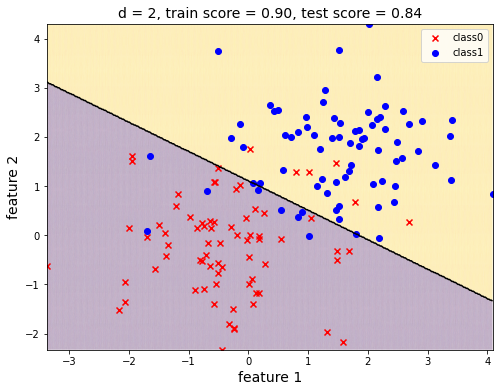

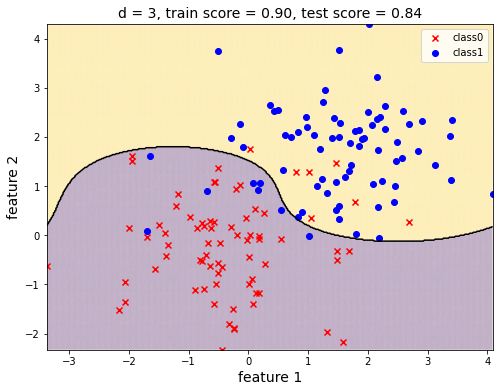

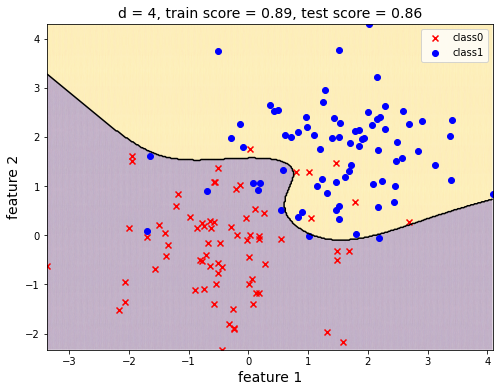

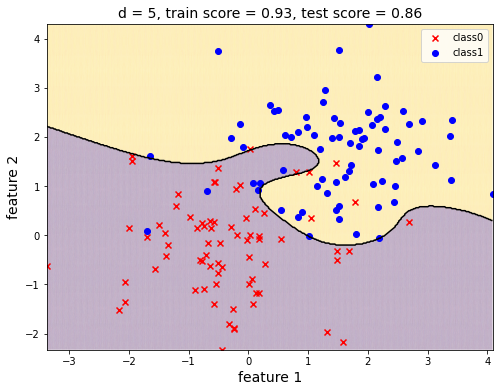

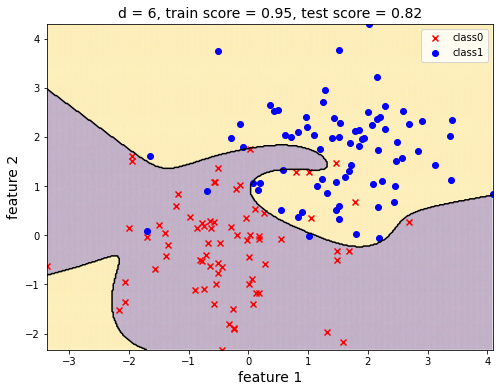

In [7]:
for degree in range(2,7):

    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)
    
    logreg = LogisticRegression(solver='liblinear',
                                max_iter=500, C=15).fit(X_poly_train, y_train)
    
    score_train = logreg.score(X_poly_train, y_train)
    score_test = logreg.score(X_poly_test, y_test)
        
    plt.figure(figsize=(8,6))
    plotDB(X_train, logreg, degree)
    plotData(X_train, y_train)
    plt.title('d = %d, train score = %.2f, test score = %.2f'
              %(degree, score_train, score_test), fontsize=14)
    plt.show()

As we can see if we set degree to be 6, the model tries hard to capture every single example and overfits the data. 
Overfitting occurs when a machine learning model learns the training data too well, capturing noise or random fluctuations in the data rather than the underlying pattern or relationship. As a result, an overfitted model performs well on the training data but generalizes poorly to unseen or new data. Such model will fail in predicting the correct classification when it sees new examples. As you see, the train dataset score is 0.93, but the test dataset score is 0.78.

Regularization is a technique used to prevent overfitting by adding a penalty term to the model's objective function. This penalty term discourages the model from learning overly complex patterns that may not generalize well to new data. Regularization techniques work by adjusting the model's coefficients or parameters during training to prioritize simpler models that capture the underlying structure of the data rather than fitting the noise.

In the context of logistic regression, regularization is typically controlled by the regularization parameter `C`. A smaller `C` value results in stronger regularization, penalizing large coefficients and promoting simpler models. Conversely, a larger `C` value leads to weaker regularization, allowing the model to fit the training data more closely.

By tuning the regularization parameter `C`, practitioners can control the trade-off between model complexity and generalization performance. A common approach is to use techniques such as cross-validation to select the optimal value of `C` that minimizes overfitting while maximizing predictive accuracy on unseen data.

When `C` is set to a larger value, such as `C=15`, it means that the regularization strength is weaker. In other words, the model will focus more on fitting the training data, potentially leading to a higher variance and overfitting. On the other hand, when `C` is set to a smaller value, such as `C=0.5`, it means that the regularization strength is stronger. In this case, the model will focus more on minimizing the complexity of the decision boundary, potentially leading to a higher bias and underfitting.

Now, let's compare the two cases when `C=15` and `C=0.5` for degree of 6.

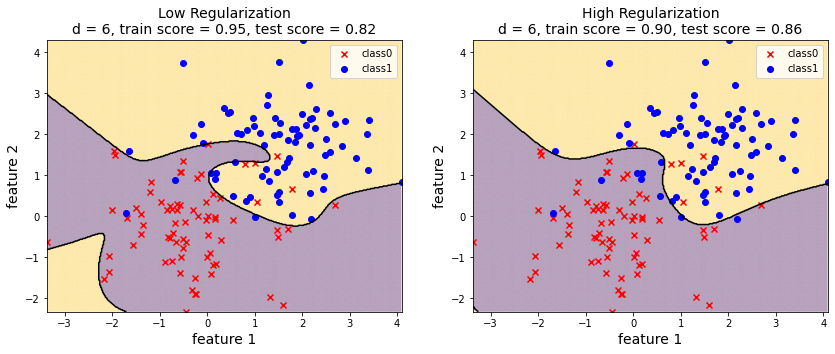

In [8]:
degree = 6

# generate polynomial features up to the specified degree
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

plt.figure(figsize=(14,5))

# Low regularization
logreg = LogisticRegression(solver='liblinear',
                            max_iter=500, C=15).fit(X_poly_train, y_train)
score_train = logreg.score(X_poly_train, y_train)
score_test = logreg.score(X_poly_test, y_test)

plt.subplot(1,2,1)
plotDB(X_train, logreg, degree)
plotData(X_train, y_train)
plt.title('Low Regularization\nd = %d, train score = %.2f, test score = %.2f'
          %(degree, score_train, score_test), fontsize=14)

# high regularization
logreg = LogisticRegression(solver='liblinear',
                            max_iter=1000, C=.5).fit(X_poly_train, y_train)
score_train = logreg.score(X_poly_train, y_train)
score_test = logreg.score(X_poly_test, y_test)

plt.subplot(1,2,2)
plotDB(X_train, logreg, degree)
plotData(X_train, y_train)
plt.title('High Regularization\nd = %d, train score = %.2f, test score = %.2f'
          %(degree, score_train, score_test), fontsize=14)

plt.show()